# Exploratory Data Analysis:


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# Let's assume 'air_quality.csv' is the name of the dataset file
air_quality = pd.read_csv('Westminster - Duke Street (Grosvenor).csv')

# Display the first few rows of the dataset
print(air_quality.head())

# Check for missing values
print(air_quality.isnull().sum())






  Site Species   ReadingDateTime  Value   Units Provisional or Ratified
0  GV2      NO  01/01/2020 00:00   64.2  ug m-3                       R
1  GV2      NO  02/01/2020 00:00   67.5  ug m-3                       R
2  GV2      NO  03/01/2020 00:00   28.3  ug m-3                       R
3  GV2      NO  04/01/2020 00:00   40.5  ug m-3                       R
4  GV2      NO  05/01/2020 00:00   23.7  ug m-3                       R
Site                        0
Species                     0
ReadingDateTime             0
Value                      21
Units                       0
Provisional or Ratified     0
dtype: int64


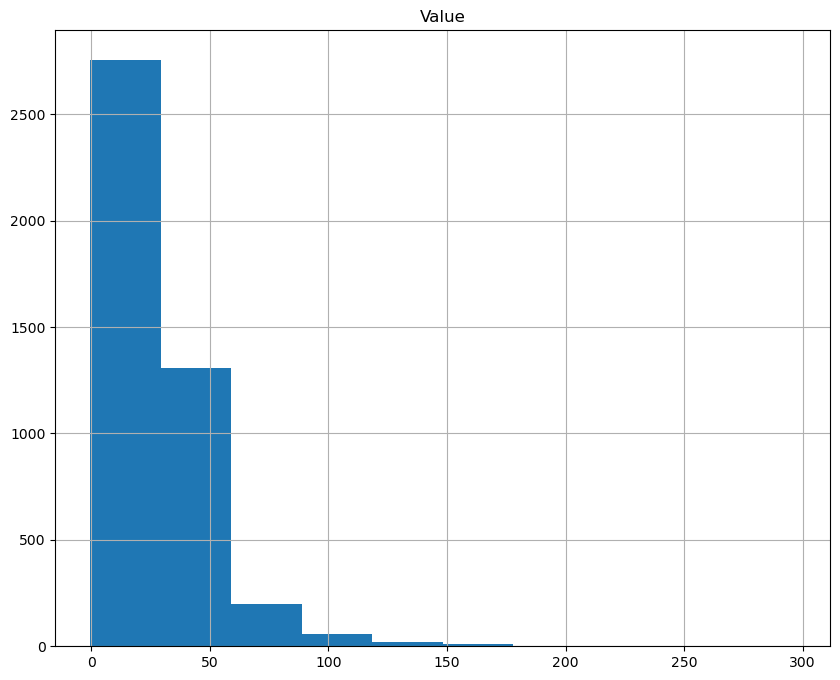

c:\Users\azfar\anaconda3\envs\python12\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


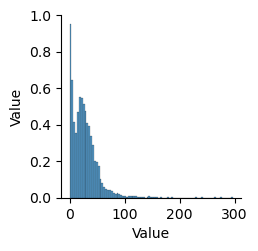

In [28]:
# Visualize the distribution of numerical variables using histograms
air_quality.hist(figsize=(10, 8))
plt.show()

# Visualize relationships between numerical variables using a pairplot
sns.pairplot(air_quality)
plt.show()

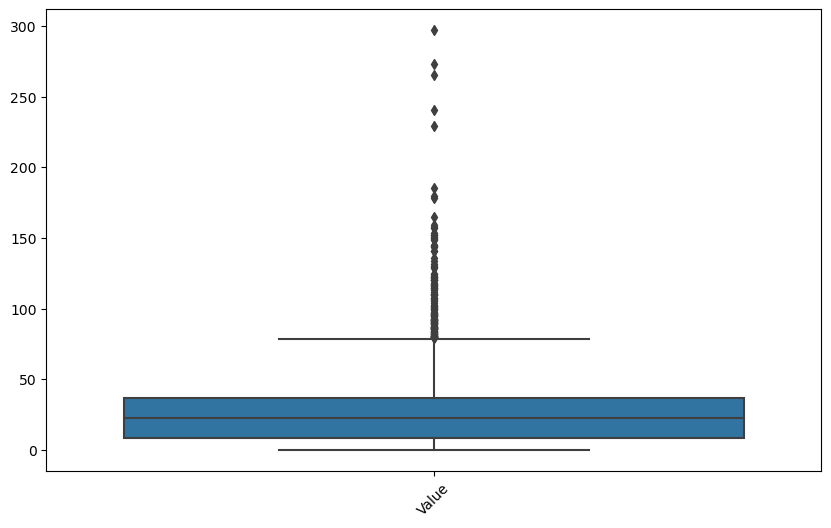

In [29]:
# Detect outliers using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=air_quality)
plt.xticks(rotation=45)
plt.show()


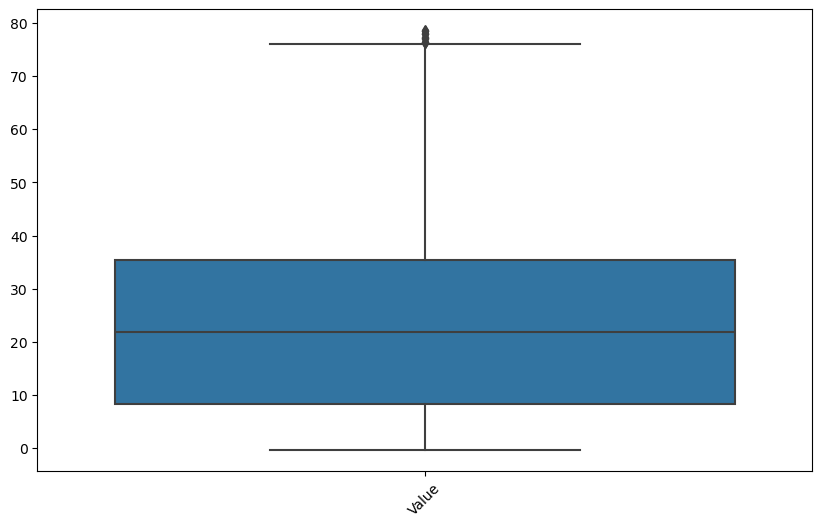

In [30]:
numeric_columns = air_quality.select_dtypes(include=np.number).columns
Q1 = air_quality[numeric_columns].quantile(0.25)
Q3 = air_quality[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
air_quality_no_outliers = air_quality[~((air_quality[numeric_columns] < (Q1 - 1.5 * IQR)) | (air_quality[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Visualize the distribution after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=air_quality_no_outliers)
plt.xticks(rotation=45)
plt.show()